## Visualize results from multi layer regression analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def boxplot_layers_results(data, title, metric):
    """
    Plot the results of the layers experiments
    """
    # Plot the results
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x="Layer", y=metric, hue="Target_name")
    plt.title(title)
    plt.xlabel("Layer Number", size=16)
    plt.xticks(np.arange(0, 50, 5))
    plt.ylabel(f"{metric}", size=16)
    plt.ylim(0,1)
    
    plt.style.use("ggplot")
    plt.show()

In [3]:
def lineplot_layers_results(results, title):
    """
    Plot the results of the layers experiments
    """
    # Plot the results
    plt.figure(figsize=(16, 8))
    sns.lineplot(data=results, x='Layer', y='spearman_Coef', hue='N_components', palette='ocean_r', legend='full')
    plt.title(f'{title}')
    plt.xticks(np.arange(0, 49, 4))
    plt.xlabel('Layer Number', size=18)
    plt.ylabel('Spearman Coeficient', size=18)
    plt.ylim(-0.1,1.1)
    plt.legend(title='Nun Components', loc='upper left', fontsize=12)
    #plt.savefig(save_path)
    plt.show()

## Tail Stability

In [5]:
res = pd.read_csv('/stor/work/Wilke/luiz/tail_stability/results/regression_stability.csv')
# group data frame by mean on column layer
cols = ['R2_score', 'MAE_score','RMSE_score', 'spearman_Coef']
res.groupby(res['Layer'])[cols].mean().query('R2_score > 0.74')

,Target_name,Layer,N_components,Model,train_R2_score,train_MAE_score,train_RMSE_score,train_spearman_Coef,test_R2_score,test_MAE_score,test_RMSE_score,test_spearman_Coef
0,stability,0,10,LinearRegression,0.384853,2.294936,2.815500,0.638222,0.384853,2.294936,2.815500,0.638222
1,stability,0,10,LinearRegression,0.389283,2.287761,2.815145,0.638610,0.389283,2.287761,2.815145,0.638610
2,stability,0,10,LinearRegression,0.382583,2.282149,2.826961,0.642052,0.382583,2.282149,2.826961,0.642052
3,stability,0,10,LinearRegression,0.380005,2.289070,2.818790,0.632244,0.380005,2.289070,2.818790,0.632244
4,stability,0,10,LinearRegression,0.391241,2.273131,2.801954,0.641591,0.391241,2.273131,2.801954,0.641591
...,...,...,...,...,...,...,...,...,...,...,...,...
4895,stability,48,500,LinearRegression,0.648049,1.678867,2.138409,0.787375,0.648049,1.678867,2.138409,0.787375
4896,stability,48,500,LinearRegression,0.650482,1.670272,2.122316,0.795508,0.650482,1.670272,2.122316,0.795508
4897,stability,48,500,LinearRegression,0.638615,1.684787,2.146339,0.785038,0.638615,1.684787,2.146339,0.785038
4898,stability,48,500,LinearRegression,0.646921,1.688880,2.144280,0.793346,0.646921,1.688880,2.144280,0.793346


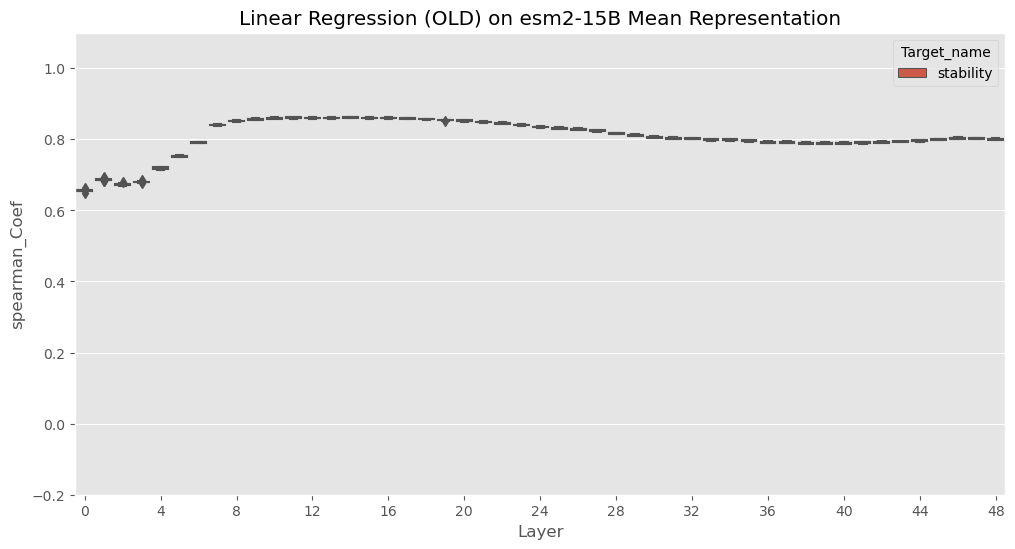

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=res, x='Layer', y='spearman_Coef', hue='Target_name')
plt.title('Linear Regression (OLD) on esm2-15B Mean Representation')
plt.ylim(-0.2,1.1)
plt.xlabel('Layer')
plt.xticks(np.arange(0, 49, 4))
plt.show()

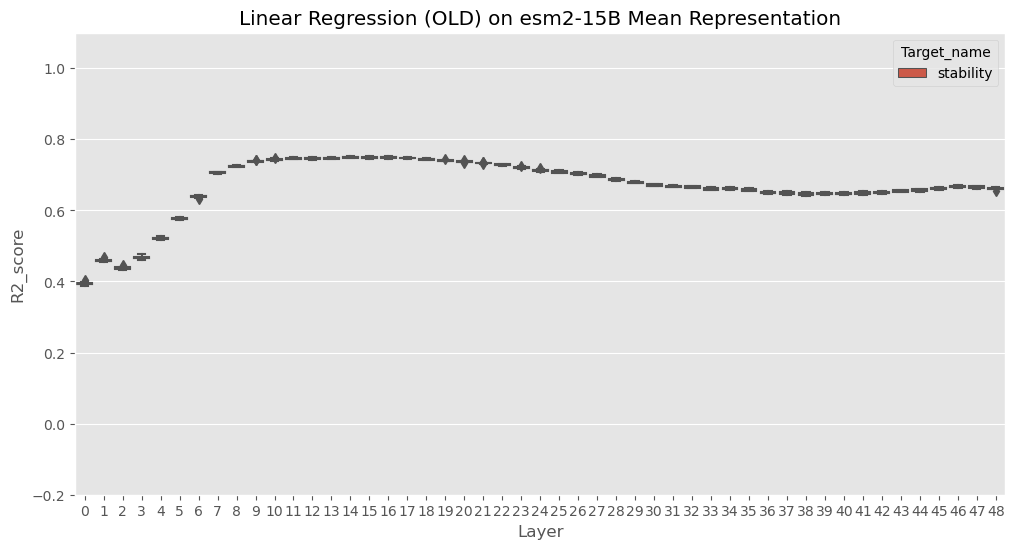

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=res, x='Layer', y='R2_score', hue='Target_name')
plt.title('Linear Regression (OLD) on esm2-15B Mean Representation')
plt.ylim(-0.2,1.1)
plt.xlabel('Layer')
plt.show()

## versiom 3

In [2]:
res = pd.read_csv('/stor/work/Wilke/luiz/tail_stability/results/res_reg_tail_stability_LR.csv', index_col=0)
res['Model'] = 'LinearRegression'
res

,Target_name,Layer,N_components,Model,train_R2_score,train_MAE_score,train_RMSE_score,train_spearman_Coef,test_R2_score,test_MAE_score,test_RMSE_score,test_spearman_Coef
0,stability,0,10,LinearRegression,0.384853,2.294936,2.815500,0.638222,0.384853,2.294936,2.815500,0.638222
1,stability,0,10,LinearRegression,0.389283,2.287761,2.815145,0.638610,0.389283,2.287761,2.815145,0.638610
2,stability,0,10,LinearRegression,0.382583,2.282149,2.826961,0.642052,0.382583,2.282149,2.826961,0.642052
3,stability,0,10,LinearRegression,0.380005,2.289070,2.818790,0.632244,0.380005,2.289070,2.818790,0.632244
4,stability,0,10,LinearRegression,0.391241,2.273131,2.801954,0.641591,0.391241,2.273131,2.801954,0.641591
...,...,...,...,...,...,...,...,...,...,...,...,...
4895,stability,48,500,LinearRegression,0.648049,1.678867,2.138409,0.787375,0.648049,1.678867,2.138409,0.787375
4896,stability,48,500,LinearRegression,0.650482,1.670272,2.122316,0.795508,0.650482,1.670272,2.122316,0.795508
4897,stability,48,500,LinearRegression,0.638615,1.684787,2.146339,0.785038,0.638615,1.684787,2.146339,0.785038
4898,stability,48,500,LinearRegression,0.646921,1.688880,2.144280,0.793346,0.646921,1.688880,2.144280,0.793346


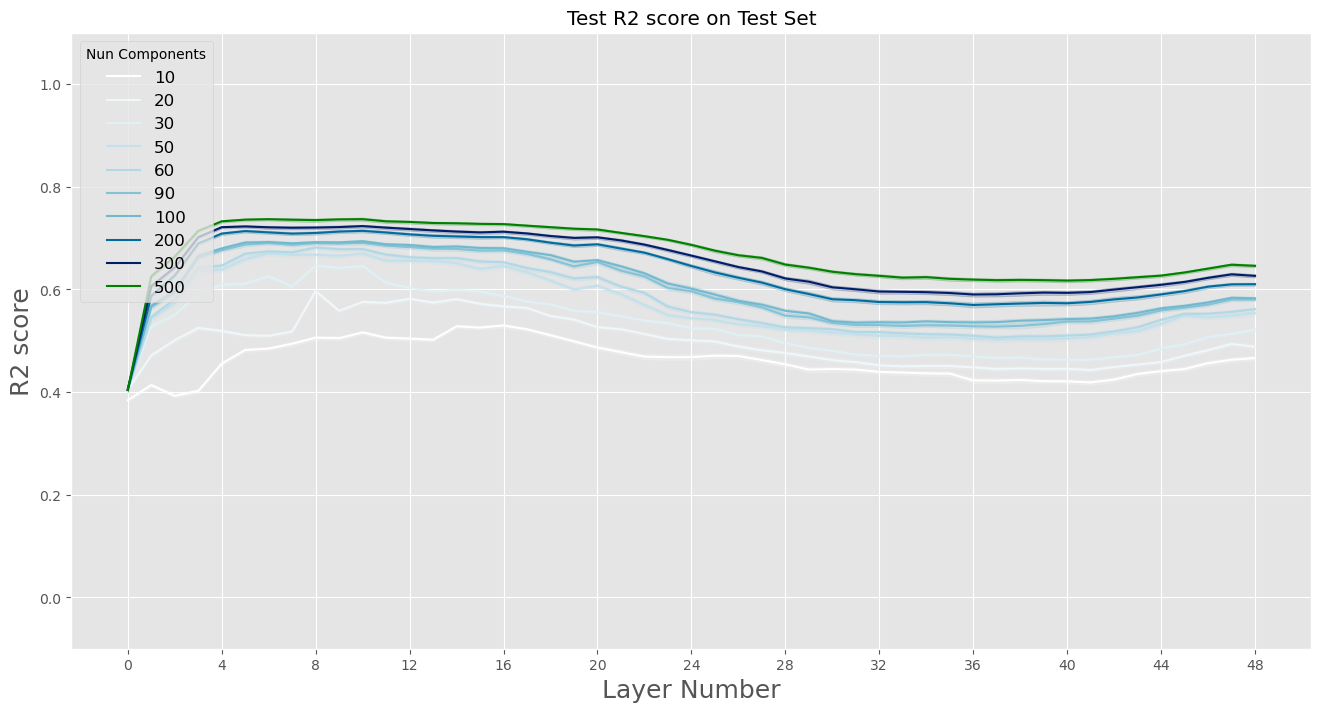

In [3]:
# Plot the results
plt.figure(figsize=(16, 8))
sns.lineplot(data=res, x='Layer', y='test_R2_score', hue='N_components', palette='ocean_r', legend='full')
plt.title(f'Test R2 score on Test Set')
plt.xticks(np.arange(0, 49, 4))
plt.xlabel('Layer Number', size=18)
plt.ylabel('R2 score', size=18)
plt.ylim(-0.1,1.1)
plt.legend(title='Nun Components', loc='upper left', fontsize=12)
#plt.savefig(save_path)
plt.show()

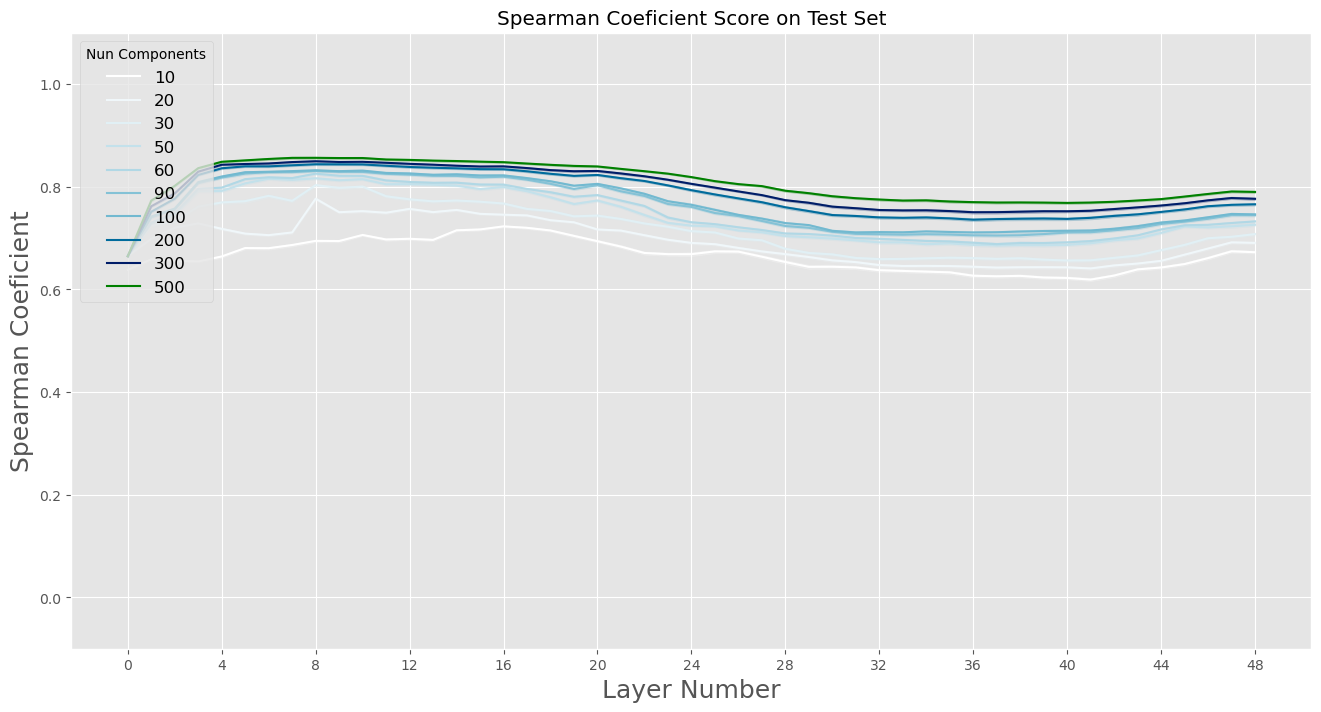

In [5]:
# Plot the results
plt.figure(figsize=(16, 8))
sns.lineplot(data=res, x='Layer', y='test_spearman_Coef', hue='N_components', palette='ocean_r', legend='full')
plt.title(f'Spearman Coeficient Score on Test Set')
plt.xticks(np.arange(0, 49, 4))
plt.xlabel('Layer Number', size=18)
plt.ylabel('Spearman Coeficient', size=18)
plt.ylim(-0.1,1.1)
plt.legend(title='Nun Components', loc='upper left', fontsize=12)
#plt.savefig(save_path)
plt.show()

In [6]:
df_melted = res.melt(id_vars=['Layer', 'N_components', 'Model'], 
         value_vars=['train_R2_score', 'train_MAE_score', 'train_RMSE_score', 'train_spearman_Coef',
                        'test_R2_score', 'test_MAE_score', 'test_RMSE_score', 'test_spearman_Coef'], 
         var_name='Dataset', 
         value_name='Scores')

df_melted

,Layer,N_components,Model,Dataset,Scores
0,0,10,LinearRegression,train_R2_score,0.384853
1,0,10,LinearRegression,train_R2_score,0.389283
2,0,10,LinearRegression,train_R2_score,0.382583
3,0,10,LinearRegression,train_R2_score,0.380005
4,0,10,LinearRegression,train_R2_score,0.391241
...,...,...,...,...,...
39195,48,500,LinearRegression,test_spearman_Coef,0.787375
39196,48,500,LinearRegression,test_spearman_Coef,0.795508
39197,48,500,LinearRegression,test_spearman_Coef,0.785038
39198,48,500,LinearRegression,test_spearman_Coef,0.793346


In [7]:
df_melted['Metric'] = df_melted['Dataset'].str.split('_', n=1, expand=True)[1]
df_melted['Dataset'] = df_melted['Dataset'].str.split('_', n=1, expand=True)[0]
df_melted

,Layer,N_components,Model,Dataset,Scores,Metric
0,0,10,LinearRegression,train,0.384853,R2_score
1,0,10,LinearRegression,train,0.389283,R2_score
2,0,10,LinearRegression,train,0.382583,R2_score
3,0,10,LinearRegression,train,0.380005,R2_score
4,0,10,LinearRegression,train,0.391241,R2_score
...,...,...,...,...,...,...
39195,48,500,LinearRegression,test,0.787375,spearman_Coef
39196,48,500,LinearRegression,test,0.795508,spearman_Coef
39197,48,500,LinearRegression,test,0.785038,spearman_Coef
39198,48,500,LinearRegression,test,0.793346,spearman_Coef


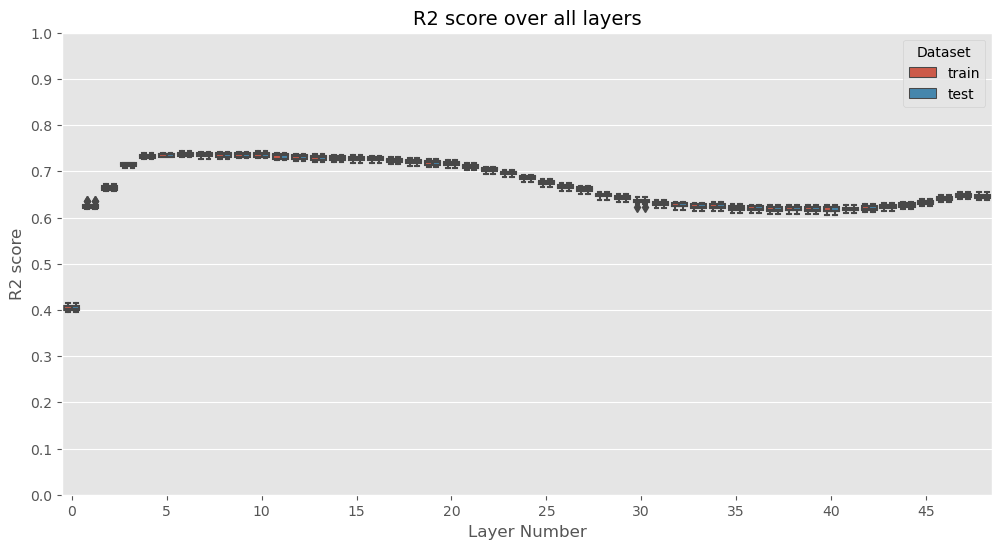

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted.query('Metric == "R2_score" & N_components == 500'), x='Layer', y='Scores', hue='Dataset')
plt.title('R2 score over all layers', size=14)
plt.xlabel('Layer Number', size=12)
plt.ylabel('R2 score', size=12)
plt.ylim(0,1)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(np.arange(0, 50, 5))
plt.show()

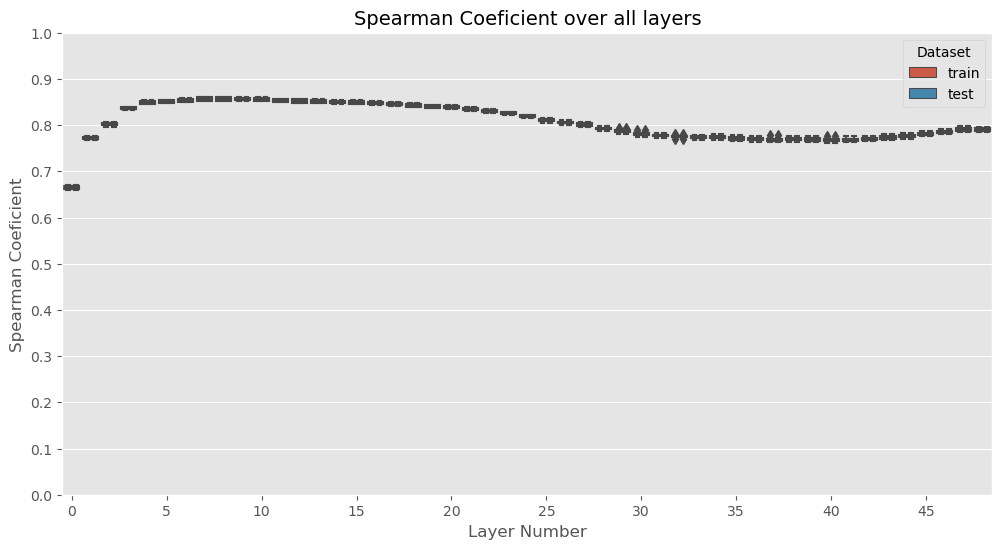

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted.query('Metric == "spearman_Coef" & N_components == 500'), x='Layer', y='Scores', hue='Dataset')
plt.title('Spearman Coeficient over all layers', size=14)
plt.xlabel('Layer Number', size=12)
plt.ylabel('Spearman Coeficient', size=12)
plt.ylim(0,1)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(np.arange(0, 50, 5))
plt.show()

## Density scatter plot

In [3]:
##
data = pd.read_csv('/stor/work/Wilke/luiz/tail_stability/results/tail_stability_regression_lasso_layer10_v02_prediction.csv')
data

,ID,sequence,stability,Target,Predictions
0,mut_1,AAADFTAKVWDAVLGDELMTLAHKYIVKTVYFMQDNR,0.0,0.0,2.580636
1,mut_5,AAGSSFALPQKRPHPRWLWEGSLPSRTPLRAMGTLRR,0.0,0.0,3.718192
2,mut_24,AEYSHFVLGNELNSYRLFLGNYMAMWGTTPSSITTTAN,0.0,0.0,-0.414499
3,mut_32,AGIALYDRRWATGSRSRWRRNVAGISPWQHSTSVWIAN,0.0,0.0,1.151471
4,mut_34,AGSDSLIKEWNLTSGSLLRRLELGEELYRLQFIDSIR,0.0,0.0,2.599994
...,...,...,...,...,...
27669,mut_138349,VKPAGEQPLQPVLNAVAAGTPAPQPQPPAESPACGDR,13.0,13.0,10.285796
27670,mut_138353,VQGGDFLPSSGRRGPACG,13.0,13.0,7.911360
27671,mut_138356,VSSAQSPPHSAGAPAAKGDSGNELLKHLLKNKKSSSR,13.0,13.0,10.956471
27672,mut_138360,YDGSDREDPRGDFHSPIVLGRPPNTEDRESPSVKRMR,13.0,13.0,9.634109


In [17]:
pd.read_csv('/stor/work/Wilke/luiz/tail_stability/results/tail_stability_regression_lasso_layer10_v02_scores.csv').

,R2,MAE,RMSE,SpearmanCoef,SpearmanPvalue,BestParameters
0,0.782122,1.267049,1.678649,0.878581,0.0,NaN


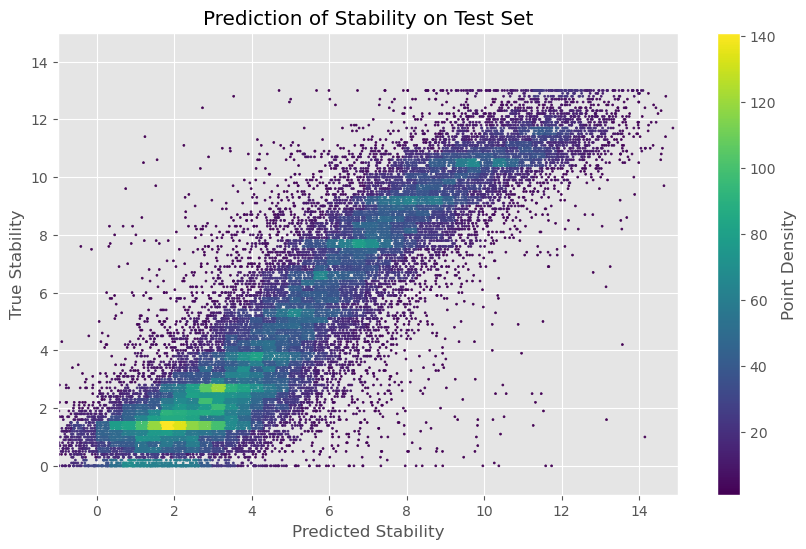

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming data is stored in a DataFrame called data
x = data['Predictions']
y = data['Target']

# Calculate 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=60)

# Determine the bin number for each point in x and y
x_bin = np.digitize(x, bins=xedges[:-1]) - 1
y_bin = np.digitize(y, bins=yedges[:-1]) - 1

# Get the value of the histogram at the bin each point falls into
z = hist[x_bin, y_bin]

# Plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sc = ax.scatter(x, y, c=z, s=2, edgecolors='face', cmap='viridis')
ax.set_title('Prediction of Stability on Test Set')
ax.set_xlabel('Predicted Stability')
ax.set_ylabel('True Stability')
cbar = plt.colorbar(sc)
cbar.set_label('Point Density')
plt.xlim(-1,15)
plt.ylim(-1,15)
plt.show()

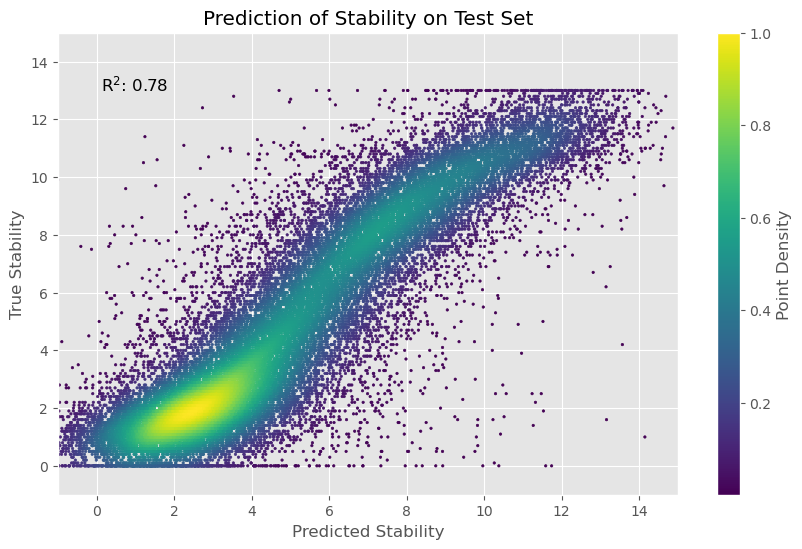

In [16]:
from scipy.stats import gaussian_kde

# Assuming data is stored in a DataFrame called data
x = data['Predictions']
y = data['Target']

# Perform kernel density estimation, to creats a smoth color range
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Normalize z values to the range [0, 1]
z_norm = z / np.max(z)

# Plot
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sc = ax.scatter(x, y, c=z_norm, s=3, edgecolor='face', cmap='viridis')
ax.set_title('Prediction of Stability on Test Set')
ax.set_xlabel('Predicted Stability')
ax.set_ylabel('True Stability')
cbar = plt.colorbar(sc)
cbar.set_label('Point Density')
plt.xlim(-1, 15)
plt.ylim(-1, 15)
plt.text(0.1, 13, 'R$^2$: 0.78', size=12)
plt.savefig('density_plot_stability_10_Lasso_no_pca.png', format='png', dpi=300)
plt.show()

## Evaluating tail features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import peptides as pep

In [2]:
data = pd.read_csv('results/tail_stability_regression_lasso_layer10_v02_prediction.csv')
data

,ID,sequence,stability,Target,Predictions
0,mut_1,AAADFTAKVWDAVLGDELMTLAHKYIVKTVYFMQDNR,0.0,0.0,2.580636
1,mut_5,AAGSSFALPQKRPHPRWLWEGSLPSRTPLRAMGTLRR,0.0,0.0,3.718192
2,mut_24,AEYSHFVLGNELNSYRLFLGNYMAMWGTTPSSITTTAN,0.0,0.0,-0.414499
3,mut_32,AGIALYDRRWATGSRSRWRRNVAGISPWQHSTSVWIAN,0.0,0.0,1.151471
4,mut_34,AGSDSLIKEWNLTSGSLLRRLELGEELYRLQFIDSIR,0.0,0.0,2.599994
...,...,...,...,...,...
27669,mut_138349,VKPAGEQPLQPVLNAVAAGTPAPQPQPPAESPACGDR,13.0,13.0,10.285796
27670,mut_138353,VQGGDFLPSSGRRGPACG,13.0,13.0,7.911360
27671,mut_138356,VSSAQSPPHSAGAPAAKGDSGNELLKHLLKNKKSSSR,13.0,13.0,10.956471
27672,mut_138360,YDGSDREDPRGDFHSPIVLGRPPNTEDRESPSVKRMR,13.0,13.0,9.634109


In [3]:
data['Length'] = data['sequence'].apply(len)
data

,ID,sequence,stability,Target,Predictions,Length
0,mut_1,AAADFTAKVWDAVLGDELMTLAHKYIVKTVYFMQDNR,0.0,0.0,2.580636,37
1,mut_5,AAGSSFALPQKRPHPRWLWEGSLPSRTPLRAMGTLRR,0.0,0.0,3.718192,37
2,mut_24,AEYSHFVLGNELNSYRLFLGNYMAMWGTTPSSITTTAN,0.0,0.0,-0.414499,38
3,mut_32,AGIALYDRRWATGSRSRWRRNVAGISPWQHSTSVWIAN,0.0,0.0,1.151471,38
4,mut_34,AGSDSLIKEWNLTSGSLLRRLELGEELYRLQFIDSIR,0.0,0.0,2.599994,37
...,...,...,...,...,...,...
27669,mut_138349,VKPAGEQPLQPVLNAVAAGTPAPQPQPPAESPACGDR,13.0,13.0,10.285796,37
27670,mut_138353,VQGGDFLPSSGRRGPACG,13.0,13.0,7.911360,18
27671,mut_138356,VSSAQSPPHSAGAPAAKGDSGNELLKHLLKNKKSSSR,13.0,13.0,10.956471,37
27672,mut_138360,YDGSDREDPRGDFHSPIVLGRPPNTEDRESPSVKRMR,13.0,13.0,9.634109,37


In [4]:
data['Instability_index'] = [round(pep.Peptide(s).instability_index(), 2) for s in data.sequence]    
data['Hydrophobicity'] = [round(pep.Peptide(s).hydrophobicity(scale="KyteDoolittle"), 2) for s in data.sequence]  
data['Charge'] = [round(pep.Peptide(s).charge(pH=7, pKscale= 'Lehninger'), 2) for s in data.sequence]

data['Isoelectric_point'] = [round(pep.Peptide(s).isoelectric_point(pKscale= 'Lehninger'), 2) for s in data.sequence]  # default values
data['mW_kDa'] = [round(pep.Peptide(s).molecular_weight() /1000, 2) for s in data.sequence] 
data 

,ID,sequence,stability,Target,Predictions,Length,Instability_index,Hydrophobicity,Charge,Isoelectric_point,mW_kDa
0,mut_1,AAADFTAKVWDAVLGDELMTLAHKYIVKTVYFMQDNR,0.0,0.0,2.580636,37,4.49,0.08,-0.91,5.31,4.23
1,mut_5,AAGSSFALPQKRPHPRWLWEGSLPSRTPLRAMGTLRR,0.0,0.0,3.718192,37,100.98,-0.70,6.09,12.78,4.19
2,mut_24,AEYSHFVLGNELNSYRLFLGNYMAMWGTTPSSITTTAN,0.0,0.0,-0.414499,38,18.07,-0.11,-0.91,5.30,4.26
3,mut_32,AGIALYDRRWATGSRSRWRRNVAGISPWQHSTSVWIAN,0.0,0.0,1.151471,38,99.37,-0.59,5.09,12.48,4.38
4,mut_34,AGSDSLIKEWNLTSGSLLRRLELGEELYRLQFIDSIR,0.0,0.0,2.599994,37,46.78,-0.26,-1.00,4.81,4.28
...,...,...,...,...,...,...,...,...,...,...,...
27669,mut_138349,VKPAGEQPLQPVLNAVAAGTPAPQPQPPAESPACGDR,13.0,13.0,10.285796,37,111.19,-0.49,-1.06,4.39,3.66
27670,mut_138353,VQGGDFLPSSGRRGPACG,13.0,13.0,7.911360,18,106.43,-0.43,0.94,8.93,1.76
27671,mut_138356,VSSAQSPPHSAGAPAAKGDSGNELLKHLLKNKKSSSR,13.0,13.0,10.956471,37,70.05,-0.86,4.18,10.73,3.76
27672,mut_138360,YDGSDREDPRGDFHSPIVLGRPPNTEDRESPSVKRMR,13.0,13.0,9.634109,37,67.28,-1.58,-0.90,5.49,4.27


In [5]:
pred_right = data[data['stability'].astype(int) == data['Predictions'].astype(int)]
pred_right

,ID,sequence,stability,Target,Predictions,Length,Instability_index,Hydrophobicity,Charge,Isoelectric_point,mW_kDa
2,mut_24,AEYSHFVLGNELNSYRLFLGNYMAMWGTTPSSITTTAN,0.0,0.0,-0.414499,38,18.07,-0.11,-0.91,5.30,4.26
7,mut_45,AIENVDFSTAKKLQGQIKSSFISTENYHTLGCLSLVR,0.0,0.0,0.933100,37,36.64,-0.09,1.03,8.77,4.10
8,mut_63,ALFCHTKSFPISWDAYWDRNDPLRDVDEAAVPVLCIR,0.0,0.0,0.967625,37,31.76,-0.12,-2.03,4.48,4.32
16,mut_109,ASSLVGIVVRITCCSTCCLVVHQIITQPWMSRVTVPAN,0.0,0.0,0.243328,38,46.26,0.98,1.84,8.17,4.09
18,mut_116,ATFDVAMRFLYECPWRRLQELRELIPNIPLQMLLRGR,0.0,0.0,-0.083839,37,85.37,-0.12,1.94,9.88,4.55
...,...,...,...,...,...,...,...,...,...,...,...
27649,mut_138231,SDKPEPKATVEEEDAKTASQEETGQRKECSTEPKEKR,13.0,13.0,13.951848,37,86.15,-2.06,-3.05,4.60,4.18
27654,mut_138260,SKTDHRAKSDVSKDVHHSTSLPNLEKEGKPHSDKRGR,13.0,13.0,13.071133,37,14.82,-1.80,3.37,10.29,4.17
27655,mut_138266,SPGENGAPGQMGPRGLPGERGRPGAPGPAGARGNDER,13.0,13.0,13.583122,37,21.39,-1.36,1.00,10.72,3.58
27662,mut_138310,TGSAVSTDDSEQEVDIEGMEFGPGELDSVGSSSDADR,13.0,13.0,13.045196,37,43.02,-0.75,-9.99,2.94,3.78


In [6]:
features = ['Length',
       'Instability_index', 'Hydrophobicity', 'Charge', 'Isoelectric_point',
       'mW_kDa']

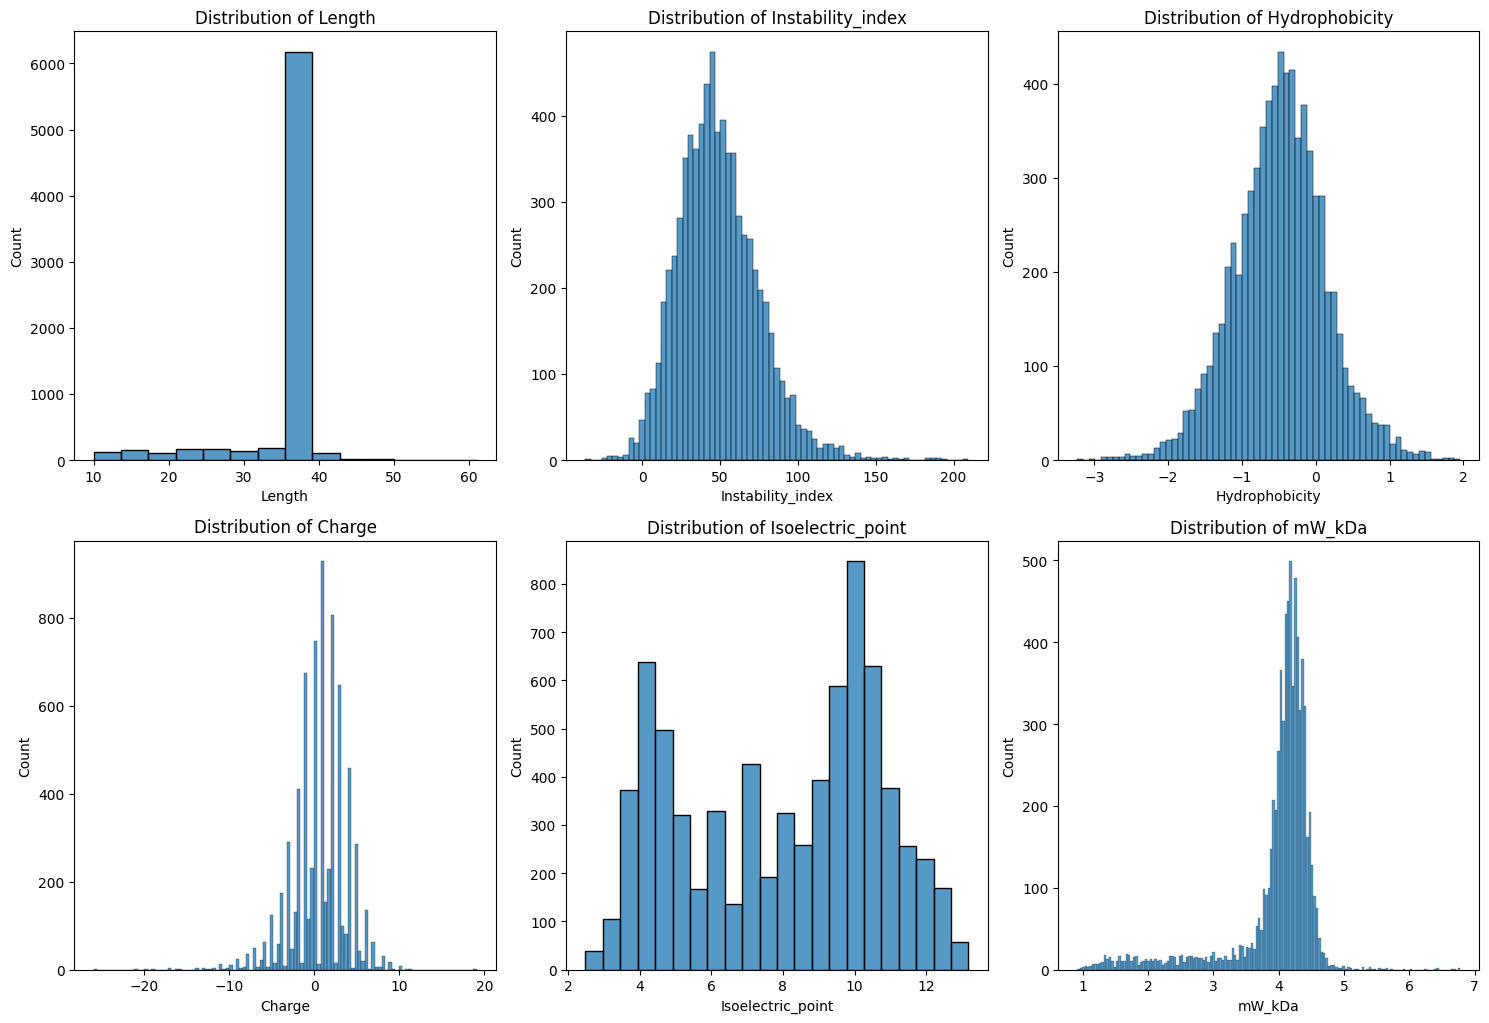

In [8]:
import math

# Determine the grid size for subplots
grid_size = math.ceil(math.sqrt(len(features)))

# Create a figure and a grid of subplots
fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axes array
axs = axs.flatten()

for i, target in enumerate(features):
    sns.histplot(pred_right[target], kde=False, ax=axs[i])
    axs[i].set_title(f'Distribution of {target}')

# Remove unused subplots
for i in range(len(features), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig('PCP_correct_preds.png', format='png', dpi=600)
plt.show()

In [9]:
pred_wrong = data[abs(data['stability'].astype(int) - data['Predictions'].astype(int)) < 5]
pred_wrong

,ID,sequence,stability,Target,Predictions,Length,Instability_index,Hydrophobicity,Charge,Isoelectric_point,mW_kDa
0,mut_1,AAADFTAKVWDAVLGDELMTLAHKYIVKTVYFMQDNR,0.0,0.0,2.580636,37,4.49,0.08,-0.91,5.31,4.23
1,mut_5,AAGSSFALPQKRPHPRWLWEGSLPSRTPLRAMGTLRR,0.0,0.0,3.718192,37,100.98,-0.70,6.09,12.78,4.19
2,mut_24,AEYSHFVLGNELNSYRLFLGNYMAMWGTTPSSITTTAN,0.0,0.0,-0.414499,38,18.07,-0.11,-0.91,5.30,4.26
3,mut_32,AGIALYDRRWATGSRSRWRRNVAGISPWQHSTSVWIAN,0.0,0.0,1.151471,38,99.37,-0.59,5.09,12.48,4.38
4,mut_34,AGSDSLIKEWNLTSGSLLRRLELGEELYRLQFIDSIR,0.0,0.0,2.599994,37,46.78,-0.26,-1.00,4.81,4.28
...,...,...,...,...,...,...,...,...,...,...,...
27668,mut_138337,TSVGSSSSDEYKQEDSQGQGKRRTSFVNKSLK,13.0,13.0,11.373445,32,86.75,-1.50,2.00,9.98,3.52
27669,mut_138349,VKPAGEQPLQPVLNAVAAGTPAPQPQPPAESPACGDR,13.0,13.0,10.285796,37,111.19,-0.49,-1.06,4.39,3.66
27671,mut_138356,VSSAQSPPHSAGAPAAKGDSGNELLKHLLKNKKSSSR,13.0,13.0,10.956471,37,70.05,-0.86,4.18,10.73,3.76
27672,mut_138360,YDGSDREDPRGDFHSPIVLGRPPNTEDRESPSVKRMR,13.0,13.0,9.634109,37,67.28,-1.58,-0.90,5.49,4.27


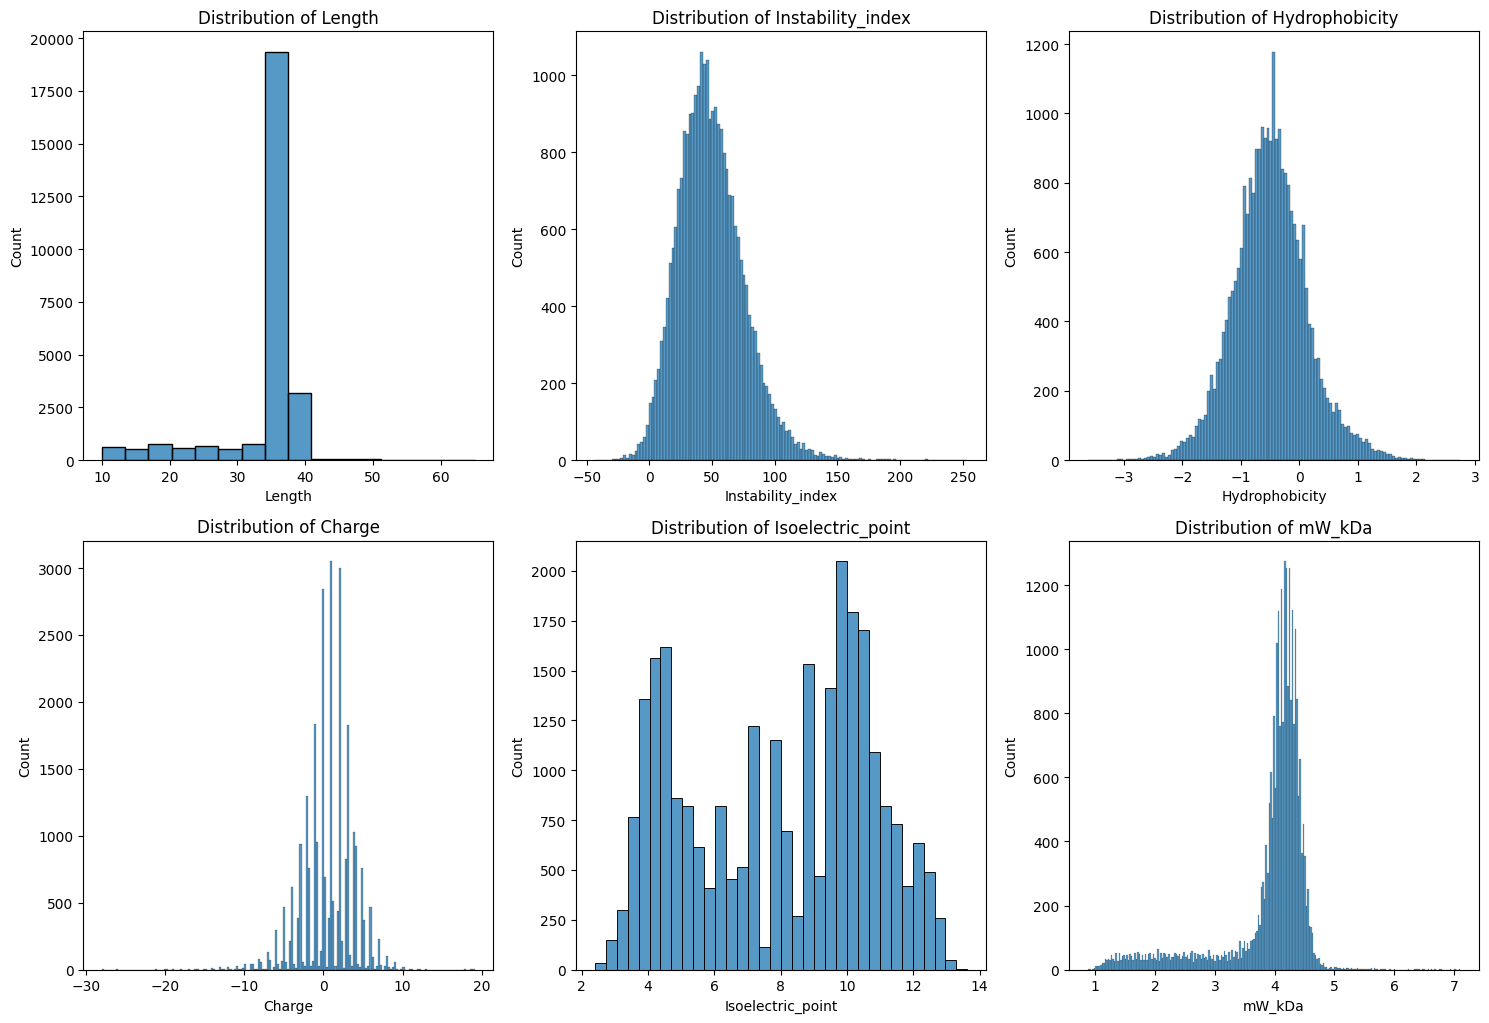

In [10]:
import math

# Determine the grid size for subplots
grid_size = math.ceil(math.sqrt(len(features)))

# Create a figure and a grid of subplots
fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axes array
axs = axs.flatten()

for i, target in enumerate(features):
    sns.histplot(pred_wrong[target], kde=False, ax=axs[i])
    axs[i].set_title(f'Distribution of {target}')

# Remove unused subplots
for i in range(len(features), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig('PCP_wrong_preds.png', format='png', dpi=600)
plt.show()

## AA frequency

In [11]:
data[['A_freq', 'C_freq', 'D_freq', 'E_freq', 'F_freq', 'G_freq', 'H_freq', 'I_freq', 'K_freq', 'L_freq', 'M_freq', 'N_freq', 'P_freq', 'Q_freq','R_freq', 'S_freq', 'T_freq', 'V_freq', 'W_freq', 'Y_freq']] = data.apply(
    lambda row: pd.Series({k:v for k,v in pep.Peptide(row['sequence']).frequencies().items() if v != 0 and k not in ['B', 'O', 'U', 'X']}),
    axis=1
)
data

,ID,sequence,stability,Target,Predictions,Length,Instability_index,Hydrophobicity,Charge,Isoelectric_point,...,M_freq,N_freq,P_freq,Q_freq,R_freq,S_freq,T_freq,V_freq,W_freq,Y_freq
0,mut_1,AAADFTAKVWDAVLGDELMTLAHKYIVKTVYFMQDNR,0.0,0.0,2.580636,37,4.49,0.08,-0.91,5.31,...,0.054054,0.027027,NaN,0.027027,0.027027,NaN,0.081081,0.108108,0.027027,0.054054
1,mut_5,AAGSSFALPQKRPHPRWLWEGSLPSRTPLRAMGTLRR,0.0,0.0,3.718192,37,100.98,-0.70,6.09,12.78,...,0.027027,NaN,0.135135,0.027027,0.162162,0.108108,0.054054,NaN,0.054054,NaN
2,mut_24,AEYSHFVLGNELNSYRLFLGNYMAMWGTTPSSITTTAN,0.0,0.0,-0.414499,38,18.07,-0.11,-0.91,5.30,...,0.052632,0.105263,0.026316,NaN,0.026316,0.105263,0.131579,0.026316,0.026316,0.078947
3,mut_32,AGIALYDRRWATGSRSRWRRNVAGISPWQHSTSVWIAN,0.0,0.0,1.151471,38,99.37,-0.59,5.09,12.48,...,NaN,0.052632,0.026316,0.026316,0.157895,0.131579,0.052632,0.052632,0.105263,0.026316
4,mut_34,AGSDSLIKEWNLTSGSLLRRLELGEELYRLQFIDSIR,0.0,0.0,2.599994,37,46.78,-0.26,-1.00,4.81,...,NaN,0.027027,NaN,0.027027,0.108108,0.135135,0.027027,NaN,0.027027,0.027027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,mut_138349,VKPAGEQPLQPVLNAVAAGTPAPQPQPPAESPACGDR,13.0,13.0,10.285796,37,111.19,-0.49,-1.06,4.39,...,NaN,0.027027,0.243243,0.108108,0.027027,0.027027,0.027027,0.081081,NaN,NaN
27670,mut_138353,VQGGDFLPSSGRRGPACG,13.0,13.0,7.911360,18,106.43,-0.43,0.94,8.93,...,NaN,NaN,0.111111,0.055556,0.111111,0.111111,NaN,0.055556,NaN,NaN
27671,mut_138356,VSSAQSPPHSAGAPAAKGDSGNELLKHLLKNKKSSSR,13.0,13.0,10.956471,37,70.05,-0.86,4.18,10.73,...,NaN,0.054054,0.081081,0.027027,0.027027,0.216216,NaN,0.027027,NaN,NaN
27672,mut_138360,YDGSDREDPRGDFHSPIVLGRPPNTEDRESPSVKRMR,13.0,13.0,9.634109,37,67.28,-1.58,-0.90,5.49,...,0.027027,0.027027,0.135135,NaN,0.162162,0.108108,0.027027,0.054054,NaN,0.027027


In [12]:
col_fill = ['A_freq', 'C_freq', 'D_freq', 'E_freq', 'F_freq', 'G_freq', 'H_freq', 'I_freq', 'K_freq', 'L_freq', 'M_freq', 'N_freq', 'P_freq', 'Q_freq','R_freq', 'S_freq', 'T_freq', 'V_freq', 'W_freq', 'Y_freq']
data[col_fill] = data[col_fill].fillna(0)
data

,ID,sequence,stability,Target,Predictions,Length,Instability_index,Hydrophobicity,Charge,Isoelectric_point,...,M_freq,N_freq,P_freq,Q_freq,R_freq,S_freq,T_freq,V_freq,W_freq,Y_freq
0,mut_1,AAADFTAKVWDAVLGDELMTLAHKYIVKTVYFMQDNR,0.0,0.0,2.580636,37,4.49,0.08,-0.91,5.31,...,0.054054,0.027027,0.000000,0.027027,0.027027,0.000000,0.081081,0.108108,0.027027,0.054054
1,mut_5,AAGSSFALPQKRPHPRWLWEGSLPSRTPLRAMGTLRR,0.0,0.0,3.718192,37,100.98,-0.70,6.09,12.78,...,0.027027,0.000000,0.135135,0.027027,0.162162,0.108108,0.054054,0.000000,0.054054,0.000000
2,mut_24,AEYSHFVLGNELNSYRLFLGNYMAMWGTTPSSITTTAN,0.0,0.0,-0.414499,38,18.07,-0.11,-0.91,5.30,...,0.052632,0.105263,0.026316,0.000000,0.026316,0.105263,0.131579,0.026316,0.026316,0.078947
3,mut_32,AGIALYDRRWATGSRSRWRRNVAGISPWQHSTSVWIAN,0.0,0.0,1.151471,38,99.37,-0.59,5.09,12.48,...,0.000000,0.052632,0.026316,0.026316,0.157895,0.131579,0.052632,0.052632,0.105263,0.026316
4,mut_34,AGSDSLIKEWNLTSGSLLRRLELGEELYRLQFIDSIR,0.0,0.0,2.599994,37,46.78,-0.26,-1.00,4.81,...,0.000000,0.027027,0.000000,0.027027,0.108108,0.135135,0.027027,0.000000,0.027027,0.027027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,mut_138349,VKPAGEQPLQPVLNAVAAGTPAPQPQPPAESPACGDR,13.0,13.0,10.285796,37,111.19,-0.49,-1.06,4.39,...,0.000000,0.027027,0.243243,0.108108,0.027027,0.027027,0.027027,0.081081,0.000000,0.000000
27670,mut_138353,VQGGDFLPSSGRRGPACG,13.0,13.0,7.911360,18,106.43,-0.43,0.94,8.93,...,0.000000,0.000000,0.111111,0.055556,0.111111,0.111111,0.000000,0.055556,0.000000,0.000000
27671,mut_138356,VSSAQSPPHSAGAPAAKGDSGNELLKHLLKNKKSSSR,13.0,13.0,10.956471,37,70.05,-0.86,4.18,10.73,...,0.000000,0.054054,0.081081,0.027027,0.027027,0.216216,0.000000,0.027027,0.000000,0.000000
27672,mut_138360,YDGSDREDPRGDFHSPIVLGRPPNTEDRESPSVKRMR,13.0,13.0,9.634109,37,67.28,-1.58,-0.90,5.49,...,0.027027,0.027027,0.135135,0.000000,0.162162,0.108108,0.027027,0.054054,0.000000,0.027027


In [13]:
data[col_fill]

,A_freq,C_freq,D_freq,E_freq,F_freq,G_freq,H_freq,I_freq,K_freq,L_freq,M_freq,N_freq,P_freq,Q_freq,R_freq,S_freq,T_freq,V_freq,W_freq,Y_freq
0,0.162162,0.000000,0.108108,0.027027,0.054054,0.027027,0.027027,0.027027,0.081081,0.081081,0.054054,0.027027,0.000000,0.027027,0.027027,0.000000,0.081081,0.108108,0.027027,0.054054
1,0.108108,0.000000,0.000000,0.027027,0.027027,0.081081,0.027027,0.000000,0.027027,0.135135,0.027027,0.000000,0.135135,0.027027,0.162162,0.108108,0.054054,0.000000,0.054054,0.000000
2,0.078947,0.000000,0.000000,0.052632,0.052632,0.078947,0.026316,0.026316,0.000000,0.105263,0.052632,0.105263,0.026316,0.000000,0.026316,0.105263,0.131579,0.026316,0.026316,0.078947
3,0.131579,0.000000,0.026316,0.000000,0.000000,0.078947,0.026316,0.078947,0.000000,0.026316,0.000000,0.052632,0.026316,0.026316,0.157895,0.131579,0.052632,0.052632,0.105263,0.026316
4,0.027027,0.000000,0.054054,0.108108,0.027027,0.081081,0.000000,0.081081,0.027027,0.216216,0.000000,0.027027,0.000000,0.027027,0.108108,0.135135,0.027027,0.000000,0.027027,0.027027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,0.189189,0.027027,0.027027,0.054054,0.000000,0.081081,0.000000,0.000000,0.027027,0.054054,0.000000,0.027027,0.243243,0.108108,0.027027,0.027027,0.027027,0.081081,0.000000,0.000000
27670,0.055556,0.055556,0.055556,0.000000,0.055556,0.277778,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.111111,0.055556,0.111111,0.111111,0.000000,0.055556,0.000000,0.000000
27671,0.135135,0.000000,0.027027,0.027027,0.000000,0.081081,0.054054,0.000000,0.135135,0.108108,0.000000,0.054054,0.081081,0.027027,0.027027,0.216216,0.000000,0.027027,0.000000,0.000000
27672,0.000000,0.000000,0.135135,0.081081,0.027027,0.081081,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.135135,0.000000,0.162162,0.108108,0.027027,0.054054,0.000000,0.027027


/stor/work/Wilke/luiz/UTPROS/venv/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


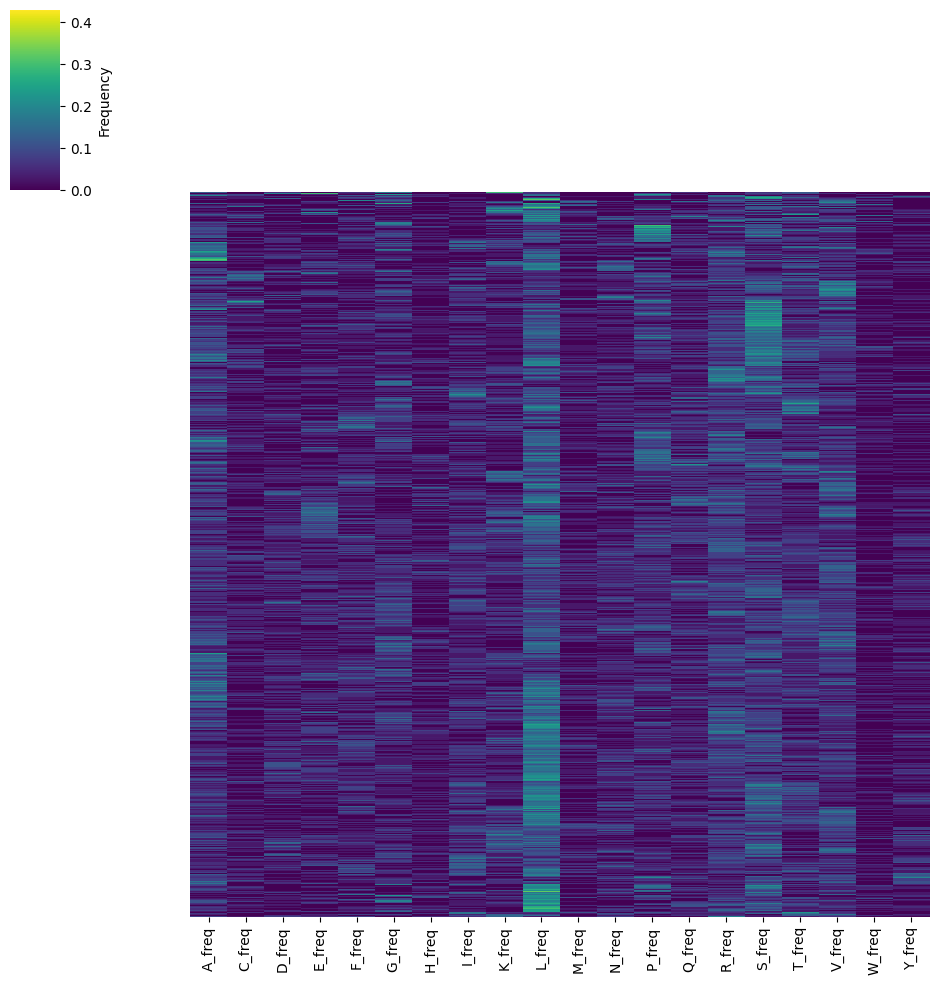

In [17]:
fig = sns.clustermap(data.query('stability <= 1')[col_fill], col_cluster=False, cmap='viridis', cbar_kws={'label': 'Frequency'})
fig.ax_row_dendrogram.set_visible(False)
fig.ax_col_dendrogram.set_visible(False)
fig.ax_heatmap.set_yticks([])
plt.show()

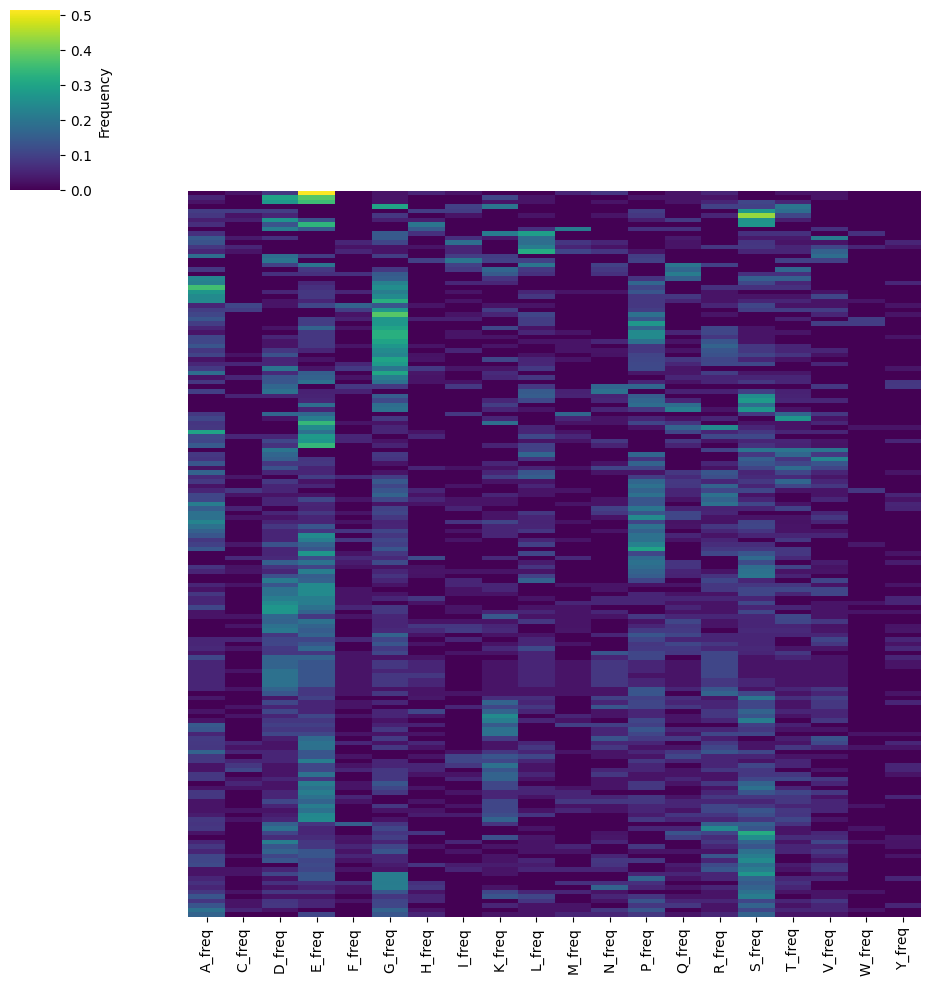

In [16]:
fig = sns.clustermap(data.query('stability >= 13')[col_fill], col_cluster=False, cmap='viridis', cbar_kws={'label': 'Frequency'})
fig.ax_row_dendrogram.set_visible(False)
fig.ax_col_dendrogram.set_visible(False)
fig.ax_heatmap.set_yticks([])
plt.show()

In [18]:
corr_columns = ['stability', 'A_freq', 'C_freq', 'D_freq', 'E_freq', 'F_freq', 'G_freq',
       'H_freq', 'I_freq', 'K_freq', 'L_freq', 'M_freq', 'N_freq', 'P_freq',
       'Q_freq', 'R_freq', 'S_freq', 'T_freq', 'V_freq', 'W_freq', 'Y_freq']

<Axes: >

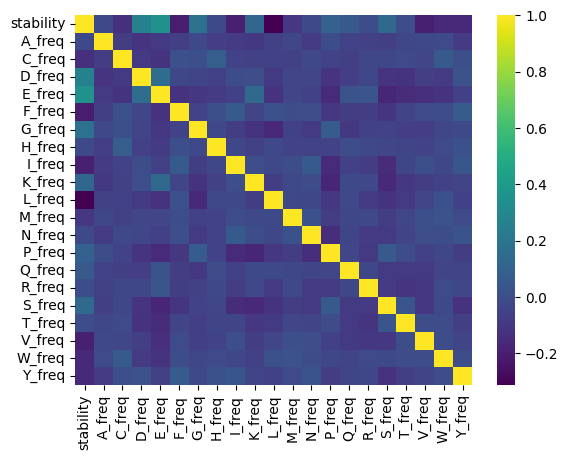

In [25]:
sns.heatmap(data[corr_columns].corr(), cmap='viridis')

Text(0, 0.5, 'Amino Acid')

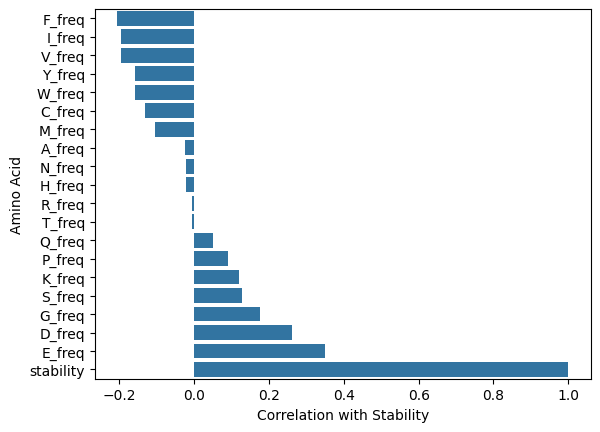

In [30]:
# Assuming 'data' is your DataFrame and 'corr_columns' is a list of column names
correlation_with_stability = {}

for col in corr_columns:
    #correlation_with_stability[col] = data.query('stability < 1')[col].corr(data['stability'])
    correlation_with_stability[col] = data[col].corr(data['stability'])

# Convert the dictionary to a Series for easy viewing
correlation_series = pd.Series(correlation_with_stability).sort_values(ascending=True)

sns.barplot(x = correlation_series[1:], y=correlation_series.index[1:])
plt.xlabel('Correlation with Stability')
plt.ylabel('Amino Acid')


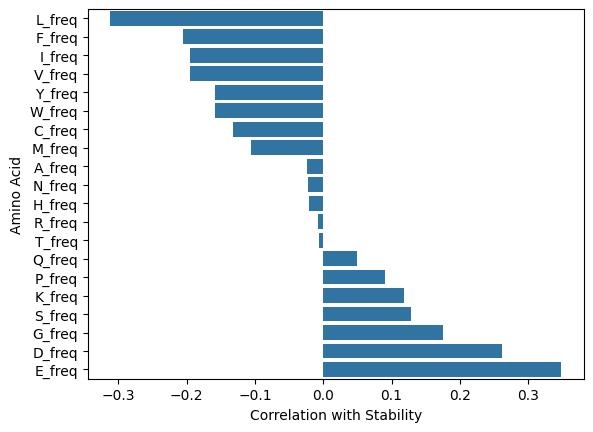

In [35]:
sns.barplot(x = correlation_series[:-1], y=correlation_series.index[:-1])
plt.xlabel('Correlation with Stability')
plt.ylabel('Amino Acid')
plt.savefig('aa_freq_corr.png', format='png', dpi=600)
plt.show()